<a href="https://colab.research.google.com/github/Amna-Sarfaraz/Disease/blob/main/Agriculture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb

In [4]:
df=pd.read_csv("/content/crop_yield.csv")

In [5]:
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [6]:
df.isnull().sum()

,0
Region,0
Soil_Type,0
Crop,0
Rainfall_mm,0
Temperature_Celsius,0
Fertilizer_Used,0
Irrigation_Used,0
Weather_Condition,0
Days_to_Harvest,0
Yield_tons_per_hectare,0


In [7]:
temperature_mean=df['Temperature_Celsius'].mean()
df['Temperature_Celsius']=df['Temperature_Celsius'].fillna(temperature_mean)
days_mean=df['Days_to_Harvest'].mean()
df['Days_to_Harvest']=df['Days_to_Harvest'].fillna(days_mean)
yield_mean=df['Yield_tons_per_hectare'].mean()
df['Yield_tons_per_hectare']=df['Yield_tons_per_hectare'].fillna(yield_mean)


In [8]:
mode_list=["Fertilizer_Used",
"Irrigation_Used"	,
"Weather_Condition"]
for i in mode_list:
  df[i]=df[i].fillna(df[i].mode()[0])

In [9]:
df.isnull().sum()

,0
Region,0
Soil_Type,0
Crop,0
Rainfall_mm,0
Temperature_Celsius,0
Fertilizer_Used,0
Irrigation_Used,0
Weather_Condition,0
Days_to_Harvest,0
Yield_tons_per_hectare,0


In [10]:
df_encoded=pd.get_dummies(df,columns=['Crop','Fertilizer_Used','Irrigation_Used','Weather_Condition',"Region", "Soil_Type"],drop_first=True)

In [12]:
X=df_encoded.drop(columns=['Yield_tons_per_hectare'])
y=df_encoded['Yield_tons_per_hectare']

In [13]:
model=xgb.XGBRegressor(bjective="reg:squarederror", random_state=42)

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
model.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:29:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "bjective" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBRegressor(base_score=None, bjective='reg:squarederror', booster=None,
             callbacks=None, colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, ...)

In [16]:
y_pred=model.predict(X_test)

In [17]:
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.9124009801698685
RMSE: 0.5025368759318447


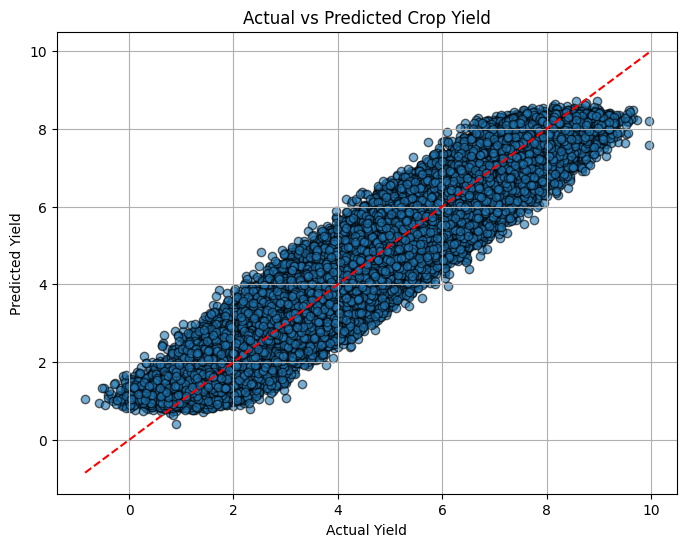

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Crop Yield')
plt.grid(True)
plt.show()

In [19]:
import joblib
joblib.dump(model, "crop_yield_model.pkl")

['crop_yield_model.pkl']